In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
import os
import xrft
from xgcm.grid import Grid
from dask.diagnostics import ProgressBar
from fastjmd95 import jmd95numba

In [34]:
RC=np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/RC.data', dtype='>f4')
DRF=np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DRF.data', dtype='>f4')
indir = '/swot/SUM01/LLC/llc_4320_agulhas/'
outdir = '/swot/SUM01/spencer/swot_agulhas_T_S/'
def output_binary_file(data, fname, dtype=np.dtype('>f4')):
    data.astype(dtype).tofile(fname)

In [3]:
ds = xr.open_dataset(indir + 'llc_4320_agulhas.0000022464.nc')

In [6]:
xr.ones_like(ds.Theta).squeeze()*

<xarray.DataArray (k: 90, j: 2160, i: 2160)>
array([[[-5.000000e-01, -5.000000e-01, -5.000000e-01, ...,
         -5.000000e-01, -5.000000e-01, -5.000000e-01],
        [-5.000000e-01, -5.000000e-01, -5.000000e-01, ...,
         -5.000000e-01, -5.000000e-01, -5.000000e-01],
        [-5.000000e-01, -5.000000e-01, -5.000000e-01, ...,
         -5.000000e-01, -5.000000e-01, -5.000000e-01],
        ...,
        [-5.000000e-01, -5.000000e-01, -5.000000e-01, ...,
         -5.000000e-01, -5.000000e-01, -5.000000e-01],
        [-5.000000e-01, -5.000000e-01, -5.000000e-01, ...,
         -5.000000e-01, -5.000000e-01, -5.000000e-01],
        [-5.000000e-01, -5.000000e-01, -5.000000e-01, ...,
         -5.000000e-01, -5.000000e-01, -5.000000e-01]],

       [[-1.570000e+00, -1.570000e+00, -1.570000e+00, ...,
         -1.570000e+00, -1.570000e+00, -1.570000e+00],
        [-1.570000e+00, -1.570000e+00, -1.570000e+00, ...,
         -1.570000e+00, -1.570000e+00, -1.570000e+00],
        [-1.570000e+00, -1.570000e+00, -1.570000e+00, ...,
         -1.570000e+00, -1.570000e+00, -1.570000e+00],
...
        [-6.301185e+03, -6.301185e+03, -6.301185e+03, ...,
         -6.301185e+03, -6.301185e+03, -6.301185e+03],
        [-6.301185e+03, -6.301185e+03, -6.301185e+03, ...,
         -6.301185e+03, -6.301185e+03, -6.301185e+03],
        [-6.301185e+03, -6.301185e+03, -6.301185e+03, ...,
         -6.301185e+03, -6.301185e+03, -6.301185e+03]],

       [[-6.760170e+03, -6.760170e+03, -6.760170e+03, ...,
         -6.760170e+03, -6.760170e+03, -6.760170e+03],
        [-6.760170e+03, -6.760170e+03, -6.760170e+03, ...,
         -6.760170e+03, -6.760170e+03, -6.760170e+03],
        [-6.760170e+03, -6.760170e+03, -6.760170e+03, ...,
         -6.760170e+03, -6.760170e+03, -6.760170e+03],
        ...,
        [-6.760170e+03, -6.760170e+03, -6.760170e+03, ...,
         -6.760170e+03, -6.760170e+03, -6.760170e+03],
        [-6.760170e+03, -6.760170e+03, -6.760170e+03, ...,
         -6.760170e+03, -6.760170e+03, -6.760170e+03],
        [-6.760170e+03, -6.760170e+03, -6.760170e+03, ...,
         -6.760170e+03, -6.760170e+03, -6.760170e+03]]], dtype=float32)
Coordinates:
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    face     int64 ...
  * i        (i) int64 1080 1081 1082 1083 1084 ... 3235 3236 3237 3238 3239
    iter     int64 ...
  * j        (j) float64 0.0 1.0 2.0 3.0 ... 2.157e+03 2.158e+03 2.159e+03
    time     timedelta64[ns] 6 days 12:00:00
    Z        (k) >f4 -0.5 -1.57 -2.79 -4.185 ... -5.882e+03 -6.301e+03 -6.76e+03

In [7]:
Density = jmd95numba.rho(ds.Salt, ds.Theta, xr.DataArray(RC,dims="k",coords=dict(Z=(["k"], RC))))

In [55]:
Density.Z[28]

<xarray.DataArray 'Z' ()>
array(-209.235, dtype=float32)
Coordinates:
    k        int64 28
    face     int64 1
    Z        >f4 -209.2

In [56]:
Surf_pressure = Density.sel(k=0)*ds.Eta
Surf_pressure2 = 1025*ds.Eta
Pressure_15m = (Density*xr.DataArray(DRF,dims="k",coords=dict(Z=(["k"], DRF)))).isel(k=slice(0,9)).sum('k')+Density.sel(k=0)*ds.Eta
Pressure_50m = (Density*xr.DataArray(DRF,dims="k",coords=dict(Z=(["k"], DRF)))).isel(k=slice(0,28)).sum('k')+Density.sel(k=0)*ds.Eta

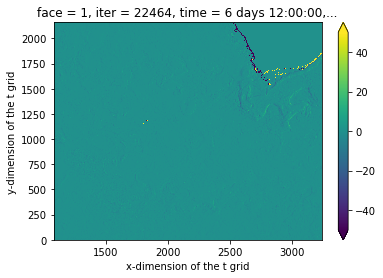

In [57]:
(Pressure_50m-Surf_pressure).diff('i').plot(vmax=50,vmin=-50)

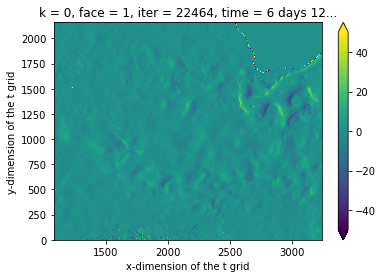

In [27]:
Surf_pressure.diff('i').plot(vmax=50,vmin=-50)

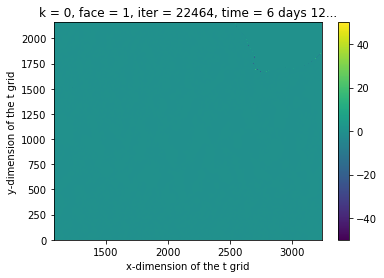

In [30]:
(Surf_pressure-Surf_pressure2).diff('i').plot(vmax=50,vmin=-50)

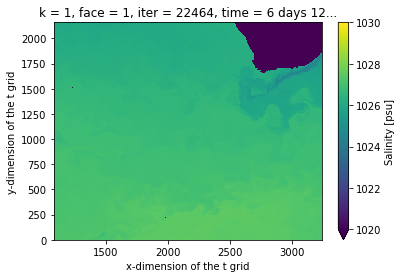

In [13]:
Density.sel(k=1).plot(vmin=1020,vmax=1030)

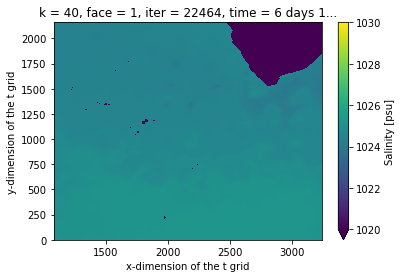

In [14]:
Density.sel(k=40).plot(vmin=1020,vmax=1030)